In [1]:
from keras.models import Model, load_model
from keras import backend as K
from keras.models import load_model
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import itertools
import sys
import numpy as np
import os
import matplotlib.pyplot as plt
net = load_model("model-resnet50-final.h5")

Using TensorFlow backend.


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("\nNormalized confusion matrix")
    else:
        print('\nConfusion matrix, without normalization')

    print(cm)
    print ()

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
def plot_graph(cnf_matrix,cls_list):
    np.set_printoptions(precision=5)


    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=cls_list,
                      title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=cls_list, normalize=True,
                      title='Normalized confusion matrix')

In [4]:
y_pred=[]
y_true=[]
cls_list = ['drawings','hentai','neutral','porn','sexy']

main_directory = "test"
counter=0
max_inference_per_class = 400
# 辨識每一張圖
for i in range(len(cls_list)):
    print(cls_list[i]+" inference running...")
    directory = os.path.join(main_directory, cls_list[i])
    for f in os.listdir(directory):
        
        f = os.path.join(directory, f)
        img = image.load_img(f, target_size=(224, 224))
        if img is None:
            continue
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis = 0)
        pred = net.predict(x)
        pred = pred.argmax()
        y_pred.append(pred)
        y_true.append(i)
        counter+=1
        if counter>=max_inference_per_class:
            counter=0
            break
    print(cls_list[i]+" inference ends")
cnf_matrix = confusion_matrix(y_true, y_pred)

drawings inference running...
drawings inference ends
hentai inference running...
hentai inference ends
neutral inference running...
neutral inference ends
porn inference running...
porn inference ends
sexy inference running...
sexy inference ends



Confusion matrix, without normalization
[[336  32  32   0   0]
 [ 38 342  18   1   1]
 [ 15   3 352   9  21]
 [  0   3  17 350  30]
 [  2   4  28  20 346]]


Normalized confusion matrix
[[0.84   0.08   0.08   0.     0.    ]
 [0.095  0.855  0.045  0.0025 0.0025]
 [0.0375 0.0075 0.88   0.0225 0.0525]
 [0.     0.0075 0.0425 0.875  0.075 ]
 [0.005  0.01   0.07   0.05   0.865 ]]



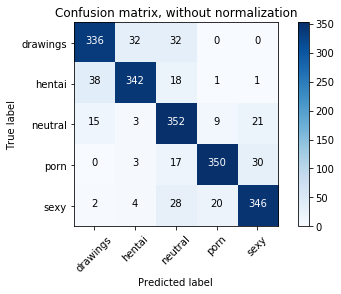

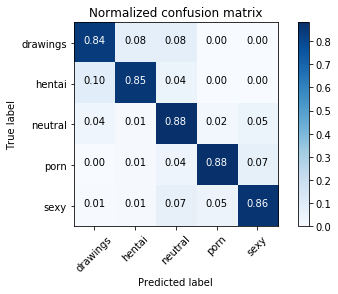

In [5]:
plot_graph(cnf_matrix,cls_list)